<div style="display: flex; align-items: center; justify-content: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/Escudo-UdeA.svg" width="150" style="margin-right: 20px;">
    <div>

# **Taller N° 3 - Estadistica y análisis exploratorio**

### Cristhian Ocampo Bolivar
### Maria Isabel Duque Buitrago
### Leidy Estefanía Silva Torres

En un estudio a gran escala realizado en EE.UU sobre la eficacia en el control de infecciones hospitalarias se recogió información en 113 hospitales. A su equipo de trabajo le corresponde analizar una muestra aleatoria de n hospitales,
que están dentro de un archivo de texto adjunto, donde n es el número de registros en el archivo asignado y X es el número de equipo asignad. La base de datos contiene las siguientes columnas (variables):

$Y$: Riesgo de infección. Probabilidad promedio estimada de adquirir infección en el hospital (en porcentaje).

$X1$: Duración de la estadía. Duración promedio de la estadía de todos los pacientes en el hospital (en días).

$X2$: Rutina de cultivos. Razón del número de cultivos realizados en pacientes sin síntomas de infección hospitalaria, por cada 100.

$X3$: Número de camas. Número promedio de camas en el hospital durante el periodo del estudio

$X4$: Censo promedio diario. Número promedio de pacientes en el hospital por día durante el periodo del estudio.

$X5$: Número de enfermeras. Número promedio de enfermeras, equivalentes a tiempo completo, durante el periodo
del estudio.


1. Emplee el análisis de regresión lineal múltiple que explique el riesgo de infección en términos de las variables
restantes (actuando como predictoras Xi). Es decir, estime los parámetros del modelo de regresión.
2. Realice la prueba de significancia del modelo, interprete.
3. Obtener el coeficiente de determinación y el coeficiente de determinación ajustado. Interprete.
4. Analice si hay problemas de multicolinealidad.
5. Realice validación de los supuestos del modelo de regresión, explique y concluya.
6. Tome un punto dentro del rango de observaciones, verifique que lo sea. Realice una predicción con este punto,
utilizando el modelo completo, interprete.

Incluya el planteamiento, librerías utilizadas, códigos, resultados numéricos y gráficos, análisis y conclusiones o interpretaciones.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/DatosTrabajo3EAE20251.txt", delimiter=" ")
df.head()

,Y,X1,X2,X3,X4,X5
0,3.1,9.41,59.5,20.6,91.7,29
1,4.1,10.47,53.2,5.7,69.1,196
2,3.2,8.19,52.1,10.8,59.2,176
3,7.7,12.78,56.8,46.0,116.9,322
4,7.8,12.07,43.7,52.4,105.3,157


# 1) **Análisis de regresión lineal multiple:**

In [ ]:
x = df[['X1', 'X2', 'X3','X4','X5']].values
y = df['Y']

X = sm.add_constant(x)

modelo = sm.OLS(y, X)
resultados = modelo.fit()

print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     12.95
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           7.46e-09
Time:                        16:03:29   Log-Likelihood:                -105.00
No. Observations:                  74   AIC:                             222.0
Df Residuals:                      68   BIC:                             235.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3199      1.606      0.199      0.8

# 2) **Prueba de significancia:**

In [ ]:
p_values = {
    "X1": {"p_value": 0.003, "nombre": "Duración estadía"},
    "X2": {"p_value": 0.977, "nombre": "Rutina de cultivos"},
    "X3": {"p_value": 0.002, "nombre": "Número de camas"},
    "X4": {"p_value": 0.408, "nombre": "Censo promedio"},
    "X5": {"p_value": 0.017, "nombre": "Número de enfermeras"}
}

alpha = 0.05

significativas = [
    f"{var}: {info['nombre']}" for var, info in p_values.items() if info["p_value"] < alpha
]

if significativas:
    print("Variables estadísticamente significativas:")
    for var in significativas:
        print(var)
else:
    print("No hay variables estadísticamente significativas.")

Variables estadísticamente significativas:
X1: Duración estadía
X3: Número de camas
X5: Número de enfermeras


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ajustamos el modelo de regresión lineal múltiple
modelo = ols('Y ~ X1 + X2 + X3 + X4+X5', data=df).fit()

# Realizamos el ANOVA
anova_table = sm.stats.anova_lm(modelo, typ=2)  # Tipo 2 es común para regresión
print(anova_table)

             sum_sq    df          F    PR(>F)
X1        10.020840   1.0   9.207705  0.003412
X2         0.000898   1.0   0.000825  0.977165
X3        11.125133   1.0  10.222390  0.002107
X4         0.753135   1.0   0.692022  0.408389
X5         6.465937   1.0   5.941262  0.017411
Residual  74.005103  68.0        NaN       NaN


**Interpretación:**
Calculando los valores p y la Anova del modelo y comparandolos con el valor de alpha, en ambas pruebas se descartan las variables X2 y X4, lo que quiere decir que estas dos variables no son significantes para el modelo.

# 3) **Coeficiente de determinación y coeficiente de determinación ajustado:**

In [ ]:
r2 = resultados.rsquared
r2_ajustado = resultados.rsquared_adj

print(f"Coeficiente de determinación (R²): {r2:.4f}")
print(f"Coeficiente de determinación ajustado (R² ajustado): {r2_ajustado:.4f}")

Coeficiente de determinación (R²): 0.4877
Coeficiente de determinación ajustado (R² ajustado): 0.4500


**Interpretación:**
El coeficiente de determinación  nos indica que el 48.77% de la variabilidad del riesgo de infección es explicado por la duración de estadía, rutina de cultivos, número de camas, censo promedio y número de enfermeras.

El coeficiente de determinación ajustado es menor que el coeficiente de determinación, lo cual indica que algunas variables no aportan información significativa como es el caso de rutina de cultivos y censo promedio de acuerdo con la prueba de significancia realizada anteriormente.

# 4) **Multicolinealidad**

In [ ]:
x = df[['X1', 'X2', 'X3', 'X4', 'X5']]
y = df['Y']

df_concat = pd.concat([x, y], axis=1)
matriz_correlacion = df_concat.corr()
print(matriz_correlacion)

          X1        X2        X3        X4        X5         Y
X1  1.000000  0.201026  0.283508  0.479496  0.308367  0.546751
X2  0.201026  1.000000 -0.318963 -0.020125 -0.139385 -0.078731
X3  0.283508 -0.318963  1.000000  0.481441  0.130921  0.513217
X4  0.479496 -0.020125  0.481441  1.000000  0.070603  0.433403
X5  0.308367 -0.139385  0.130921  0.070603  1.000000  0.384870
Y   0.546751 -0.078731  0.513217  0.433403  0.384870  1.000000


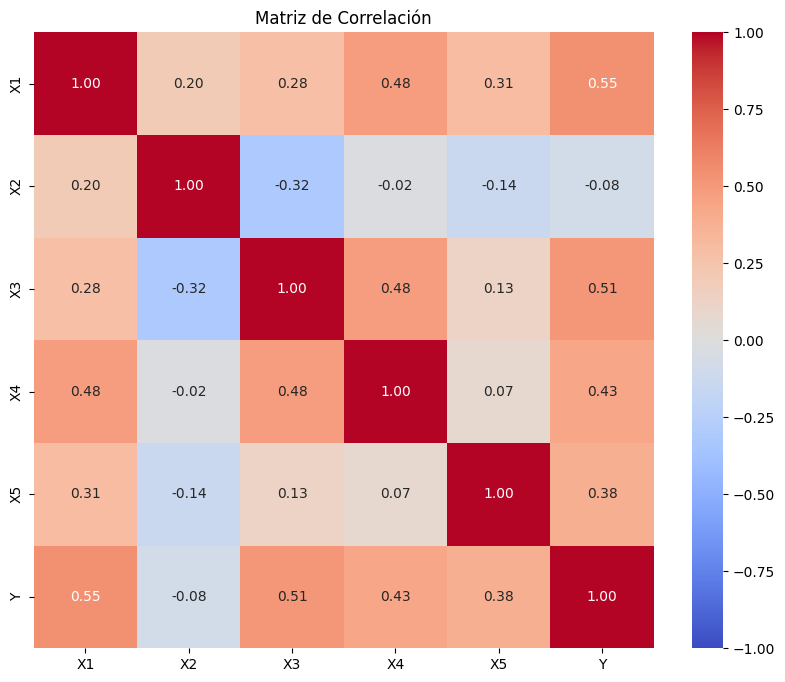

In [ ]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
#Calculo de VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_estax = df.copy()
df_estax[['X1', 'X2', 'X3','X4','X5']] = scaler.fit_transform(df[['X1', 'X2', 'X3', 'X4','X5']])

df_estay= pd.DataFrame()
df_estay[['Y']]=scaler.fit_transform(df[['Y']])

X= df_estax[['X1', 'X2', 'X3','X4','X5']]
y= df_estay['Y']

#Crear modelo
X = sm.add_constant(X)
modelo = sm.OLS(y, X)
resultados = modelo.fit()

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Clasificar multicolinealidad
def clasificar_vif(vif):
    if vif <= 5:
        return "No hay multicolinealidad"
    elif 5 < vif <= 10:
        return "Multicolinealidad moderada"
    else:
        return "Multicolinealidad severa"

vif_data["Clasificación"] = vif_data["VIF"].apply(clasificar_vif)
print(vif_data)

  Variable       VIF             Clasificación
0    const  1.000000  No hay multicolinealidad
1       X1  1.623328  No hay multicolinealidad
2       X2  1.301224  No hay multicolinealidad
3       X3  1.530550  No hay multicolinealidad
4       X4  1.585956  No hay multicolinealidad
5       X5  1.177956  No hay multicolinealidad


In [ ]:
X = sm.add_constant(X)

xtx = (X.T @ X)

eigenvalues, eigenvectors = np.linalg.eig(xtx)

eigenvalor_max = np.max(eigenvalues)

resultados = []
for eigenvalor in eigenvalues:
    if eigenvalor != eigenvalor_max:
        resultado = np.sqrt(eigenvalor_max / eigenvalor)
        resultados.append(resultado)

indices_condicion = np.sqrt(resultados)
print(indices_condicion)


[1.18018808 1.1167504  1.49560036 1.45589401 1.18222873]


**Interpretación:**
De acuerdo con las dos pruebas realizadas, no se evidencian problemas de multicolinealidad en el modelo es decir que, las variables explicativas del modelo que se asumen como fijas e independientes no presentan entre ellas relación de dependencia lineal.


# 5) **Validación de los supuestos del modelo de regresión:**

In [ ]:
x = df[['X1', 'X2', 'X3','X4','X5']].values
y = df['Y']

X = sm.add_constant(x)

modelo = sm.OLS(y, X)
resultados = modelo.fit()

'1) Independencia:'

from statsmodels.stats.stattools import durbin_watson

# Calcular el estadístico de Durbin-Watson
dw = durbin_watson(resultados.resid)

# Imprimir el resultado del Durbin-Watson
print(f"Estadístico de Durbin-Watson: {dw}")

if dw < 1.5:
    print("Posible autocorrelación positiva (residuos correlacionados positivamente).")
elif dw > 2.5:
    print("Posible autocorrelación negativa (residuos correlacionados negativamente).")
else:
    print("No hay autocorrelación (los residuos son independientes).")

Estadístico de Durbin-Watson: 2.0918102156279628
No hay autocorrelación (los residuos son independientes).


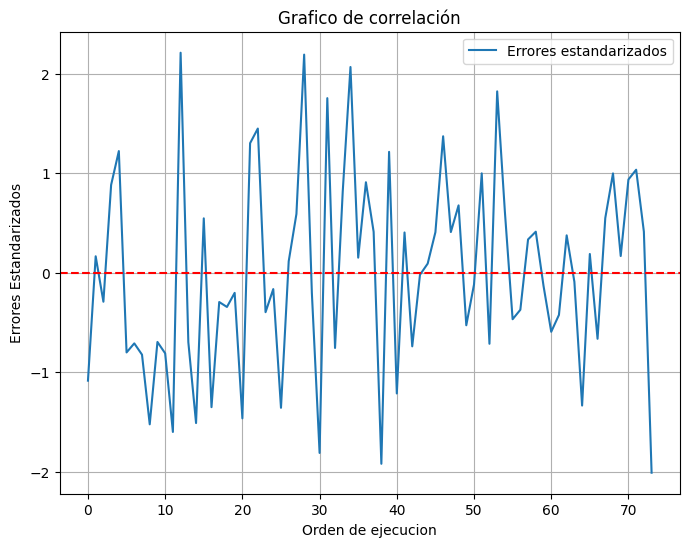

In [ ]:
# Grafico de correlación
Y_pred = resultados.predict(X)
errores = y - Y_pred
errores_estandarizados = (errores - np.mean(errores)) / np.std(errores)
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(errores_estandarizados)), errores_estandarizados, label='Errores estandarizados')
plt.axhline(y=0, color='r', linestyle='--')  # Línea en y=0 para referencia
plt.title('Grafico de correlación')
plt.xlabel('Orden de ejecucion')
plt.ylabel('Errores Estandarizados')
plt.legend()
plt.grid(True)
plt.show()

**Interpretación:**

Mediante la prueba estadistica Durbin - Watson y al graficar los errores estandarizados en función del orden de ejecución se comprueba que no hay dependencia entre los residuos para el modelo de regresión lineal propuesto.

In [ ]:
'2) Normalidad:'

#Ho: Los residuos siguen una distribución normal
#Ha: Los residuos no siguen una distribucion normal

import scipy.stats as stats
stat, p_value = stats.shapiro(resultados.resid)

print("Estadística de Shapiro-Wilk:", stat)
print("Valor p de la prueba de Shapiro-Wilk:", p_value)

alpha = 0.05
if p_value <= alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Estadística de Shapiro-Wilk: 0.9863438765052598
Valor p de la prueba de Shapiro-Wilk: 0.6103613888427681
No podemos rechazar la hipótesis nula


<Figure size 800x600 with 0 Axes>

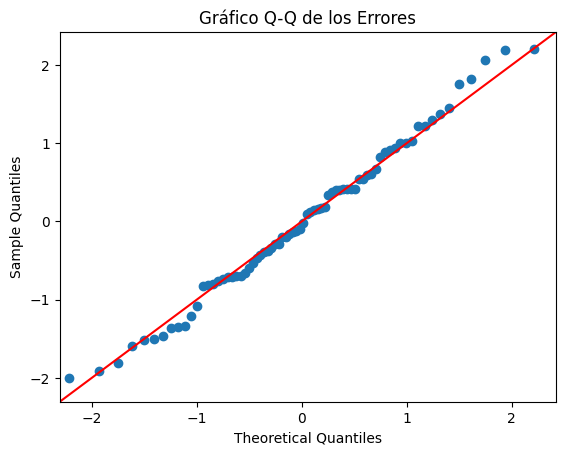

In [ ]:
# Grafico Q'Q
fig = plt.figure(figsize=(8, 6))
sm.qqplot(errores_estandarizados, line='45')
plt.title('Gráfico Q-Q de los Errores')
plt.show()

**Interpretación:**

Mediante la prueba estadistica Shapiro Wilk y al realizar el gráfico Q-Q se comprueba que los residuos del modelo de regresión lineal siguen una distribución normal

In [ ]:
'3) Varianza Constante'

from statsmodels.stats.diagnostic import het_breuschpagan

test_bpg = het_breuschpagan(resultados.resid, X)
print(f"Estadístico de Breusch-Pagan: {test_bpg[0]}")
print(f"P-valor de Breusch-Pagan: {test_bpg[1]}")

if test_bpg[1] < 0.05:
    print("Hay evidencia de heterocedasticidad (varianza no constante).")
else:
    print("No hay evidencia de heterocedasticidad (varianza constante).")

Estadístico de Breusch-Pagan: 6.309528375893805
P-valor de Breusch-Pagan: 0.27725472008994123
No hay evidencia de heterocedasticidad (varianza constante).


**Interpretación:**

Mediante la prueba estadistica Breush - Pagan se comprueba que los residuos del modelo de regresión lineal tienen varianza constante.

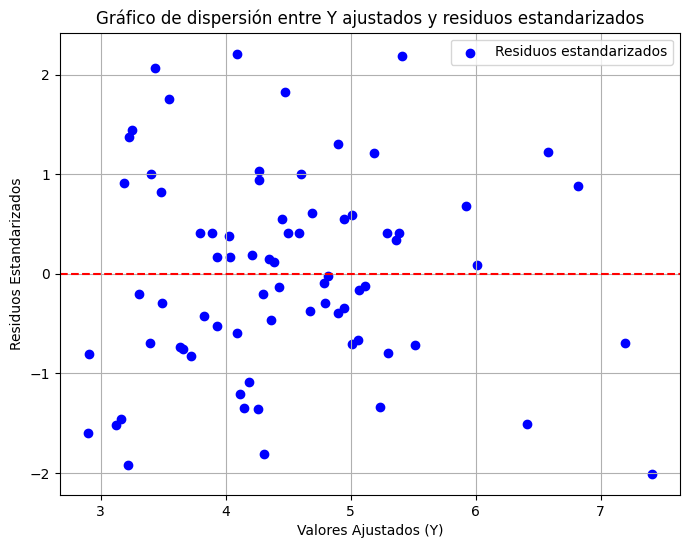

In [ ]:
'4) Linealidad'
Y_ajustados = resultados.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(Y_ajustados, errores_estandarizados, color='blue', label='Residuos estandarizados')
plt.axhline(0, color='red', linestyle='--')  # Línea en y=0 para referencia
plt.title('Gráfico de dispersión entre Y ajustados y residuos estandarizados')
plt.xlabel('Valores Ajustados (Y)')
plt.ylabel('Residuos Estandarizados')
plt.legend()
plt.grid(True)
plt.show()

**Interpretación:**
 Al realizar el gráfico de Residuos estandarizados Vs Valores ajustados se observa que los residuos del modelo de regresión lineal presentan linealidad ya qué no se observa Patrones comunes en residuales asociados a no linealidad.

 ## A partir de la validación de supuestos se puede concluir que el modelo de regresión lineal es apropiado y los resultados obtenidos son válidos ya que los residuos cumplen independencia, normalidad, varianza constante y linealidad.

# 6) **Punto dentro del rango de observaciones:**


In [ ]:
model = sm.OLS(df['Y'], X)
results = model.fit()
hat = results.get_influence().hat_matrix_diag
H_max = np.max(hat)

In [ ]:
print("Máximo valor de la matriz hat:", H_max)

Máximo valor de la matriz hat: 0.440381771705933


In [ ]:
Xo = np.array([1,10.18, 54.9, 18.5, 103.2,228])
Ho = np.dot(Xo, np.linalg.inv(np.dot(X.T, X)))
Ho = np.dot(Ho, Xo.T)
print("Valor de Ho:", Ho)

Valor de Ho: 0.036084915222617434


In [ ]:
if Ho < H_max:
    print("El punto Xo es un punto de interpolación ya que Ho < H_Max.")
else:
    print("El punto Xo es un punto de extrapolación ya que Ho > H_Max.")

El punto Xo es un punto de interpolación ya que Ho < H_Max.


In [ ]:
model = sm.OLS(df['Y'], X)
results = model.fit()
hat = results.get_influence().hat_matrix_diag
hat
np.max(hat)
Xo = np.array([1,10.18, 54.9, 18.5, 103.2,228])
Ho = np.dot(Xo, np.linalg.inv(np.dot(X.T, X)))
Ho = np.dot(Ho, Xo.T)
Ho

np.float64(0.036084915222617434)

In [ ]:
y_pred = results.predict([Xo])
print("Predicción para el nuevo punto:", y_pred)

Predicción para el nuevo punto: [4.70101416]


**Interpretación**:
Para el punto de observación definido como:

$X1$: Duración de la estadía = 10.18

$X2$: Rutina de cultivos = 54.9

$X3$: Número de camas= 18.5

$X4$: Censo promedio diario = 103.2

$X5$: Número de enfermera = 228

y para el cual se comprobo que se encuentra dentro del rango de observación para se obtiene un valor de $Y$ = 4.7010. que corresponde a la predicción del riesgo de infección para las condiciones dadas a partir de la combinación de los efectos de cada una de las variables según el modelo de regresión lineal múltiple ajustado.

